###  Loading libraries and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, recall_score, roc_auc_score, f1_score, fbeta_score

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier

import eli5
from eli5.sklearn import PermutationImportance

In [2]:
df = pd.read_csv("C:\\Users\\user\\Desktop\\churn prediction model\\archive\\churn-bigml-80.csv")

### Undertanding the data

In [3]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.columns = df.columns.str.replace(' ', '_')

In [5]:
df.shape

(2666, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account_length          2666 non-null   int64  
 2   Area_code               2666 non-null   int64  
 3   International_plan      2666 non-null   object 
 4   Voice_mail_plan         2666 non-null   object 
 5   Number_vmail_messages   2666 non-null   int64  
 6   Total_day_minutes       2666 non-null   float64
 7   Total_day_calls         2666 non-null   int64  
 8   Total_day_charge        2666 non-null   float64
 9   Total_eve_minutes       2666 non-null   float64
 10  Total_eve_calls         2666 non-null   int64  
 11  Total_eve_charge        2666 non-null   float64
 12  Total_night_minutes     2666 non-null   float64
 13  Total_night_calls       2666 non-null   int64  
 14  Total_night_charge      2666 non-null   

In [7]:
df.isnull().sum()

State                     0
Account_length            0
Area_code                 0
International_plan        0
Voice_mail_plan           0
Number_vmail_messages     0
Total_day_minutes         0
Total_day_calls           0
Total_day_charge          0
Total_eve_minutes         0
Total_eve_calls           0
Total_eve_charge          0
Total_night_minutes       0
Total_night_calls         0
Total_night_charge        0
Total_intl_minutes        0
Total_intl_calls          0
Total_intl_charge         0
Customer_service_calls    0
Churn                     0
dtype: int64

### Exploratory Data Analysis

In [8]:
for column in df.columns:
    unique_values = len(df[column].unique())
    print(f"number of unique values in column {column}: {unique_values}")

number of unique values in column State: 51
number of unique values in column Account_length: 205
number of unique values in column Area_code: 3
number of unique values in column International_plan: 2
number of unique values in column Voice_mail_plan: 2
number of unique values in column Number_vmail_messages: 42
number of unique values in column Total_day_minutes: 1489
number of unique values in column Total_day_calls: 115
number of unique values in column Total_day_charge: 1489
number of unique values in column Total_eve_minutes: 1442
number of unique values in column Total_eve_calls: 120
number of unique values in column Total_eve_charge: 1301
number of unique values in column Total_night_minutes: 1444
number of unique values in column Total_night_calls: 118
number of unique values in column Total_night_charge: 885
number of unique values in column Total_intl_minutes: 158
number of unique values in column Total_intl_calls: 21
number of unique values in column Total_intl_charge: 158
n

In [9]:
df.describe()

,Account_length,Area_code,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


We'll assess the link between categorical variables and churn using a chi-squared test. This test checks if there's a 
significant connection between two categorical variables by comparing observed to expected frequencies under the assumption of independence.

The hypotheses are:

Null (H0): No significant relationship between the variables.

Alternative (Ha): A significant relationship exists.


The goal is to determine whether the variables are independent or associated.

In [10]:
def chi_2_test(df, column2, column1 = 'Churn'):
    data = pd.crosstab(df[column1], df[column2], rownames=[column1], colnames=[column2])
    stat, p, dof, expected = chi2_contingency(data)
    alpha = 0.05
    print("p value is " + str(p))
    if p <= alpha:
        print(f"{column2} and {column1} are dependant!")
    else : 
        print(f"{column2} and {column1} are independant!")

#### Relationship between state and churn

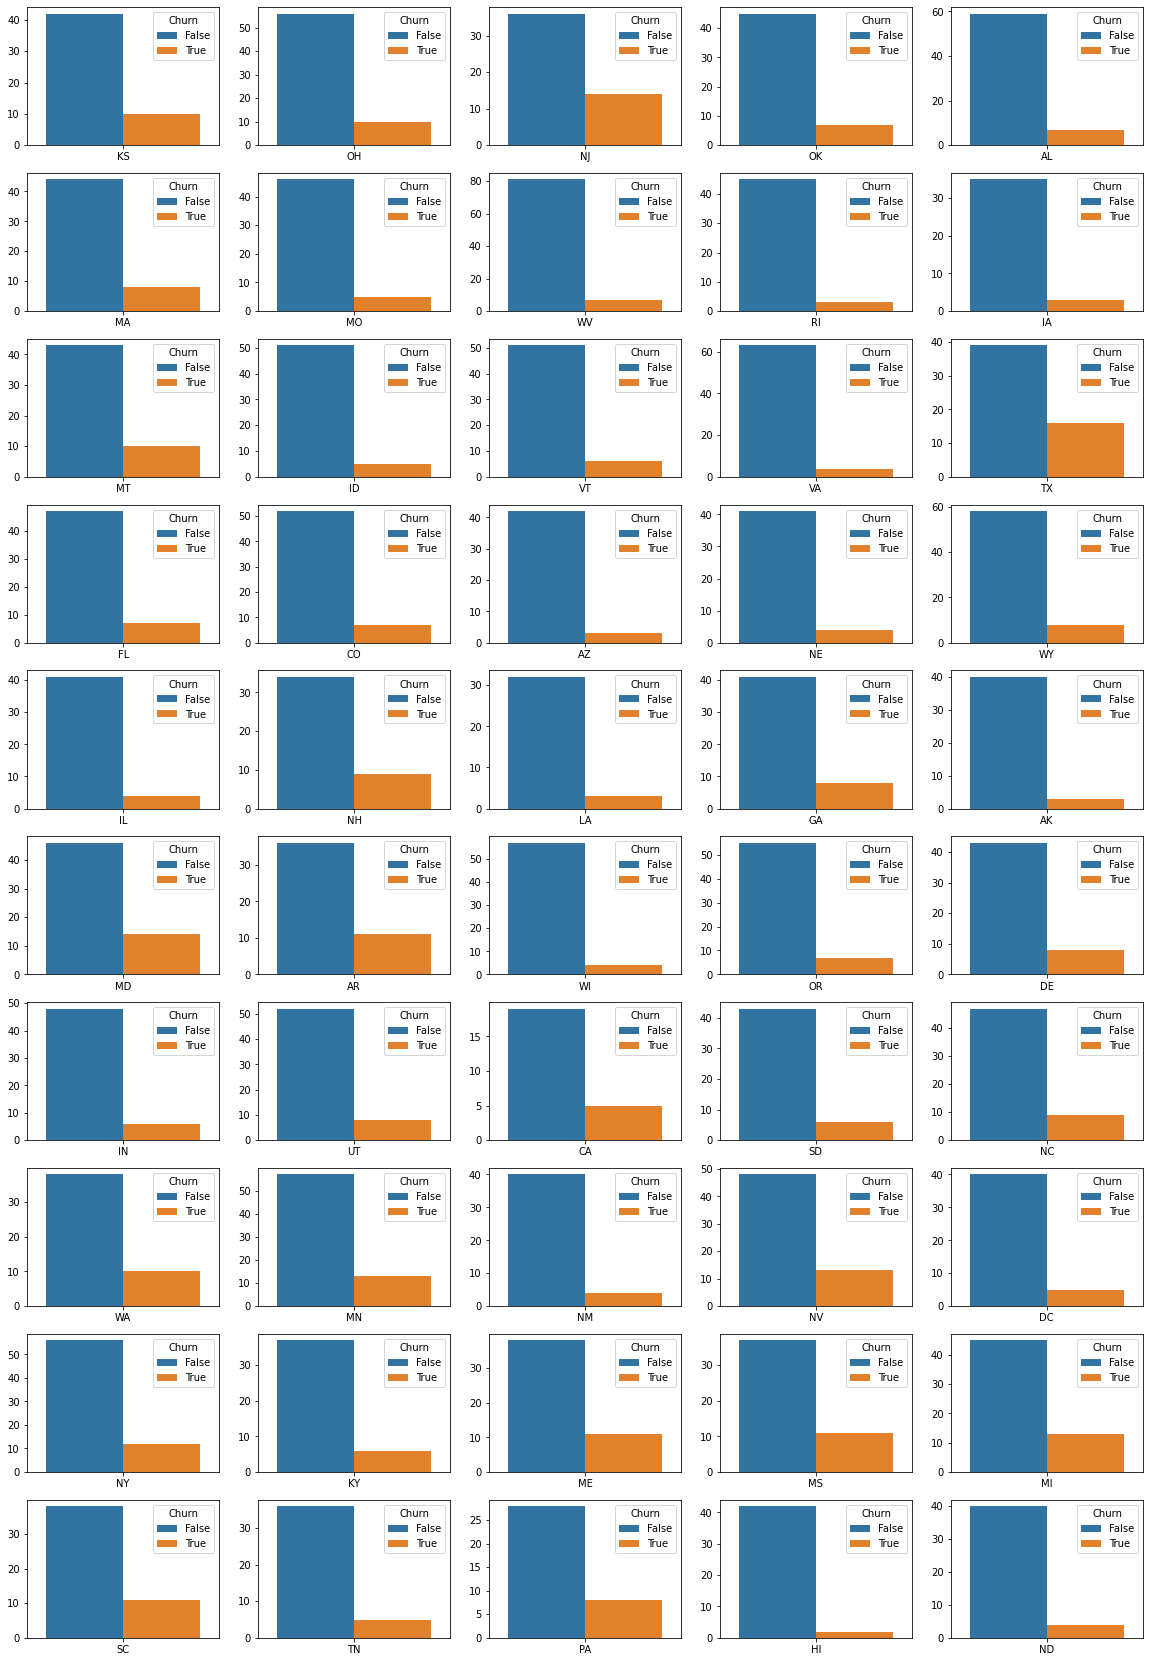

In [11]:
fig, axes = plt.subplots(10,5,figsize = (20,30))
for i in range(len(df['State'].unique()) - 1):
    state_i = df[df['State'] == df['State'].unique()[i]]
    sns.countplot(data=state_i, x='State', hue='Churn', ax = axes[i//5, i%5])
    axes[i//5,i%5].set_ylabel("")
    axes[i//5,i%5].set_xlabel("")

In [12]:
chi_2_test(df,"State")

p value is 0.004680701679944942
State and Churn are dependant!


#### There are too many states to include, we are going to summarize them into a shorter variable that is more significant and that brings as much information.

In [13]:
tab = pd.crosstab(df["Churn"], df["State"], rownames=['Churn'], colnames=['State'], normalize = "columns")
churn_more_10 = list(tab.iloc[1][(tab.iloc[1] >= 0.1) & (tab.iloc[1] <= 0.2)].index)
churn_more_20 = list(tab.iloc[1][tab.iloc[1] > 0.2].index)
churn_less_10 = list(tab.iloc[1][tab.iloc[1] < 0.1].index)

In [14]:
df['State'].replace(churn_less_10, 0, inplace=True)
df['State'].replace(churn_more_10, 1, inplace=True)
df['State'].replace(churn_more_20, 2, inplace=True)

<AxesSubplot:xlabel='State', ylabel='count'>

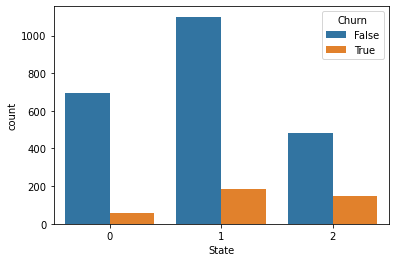

In [15]:
sns.countplot(data=df, x='State', hue='Churn')

In [16]:
chi_2_test(df,"State")

p value is 3.164053922894711e-15
State and Churn are dependant!


#### Relationship between International plan and churn

<AxesSubplot:xlabel='International_plan', ylabel='count'>

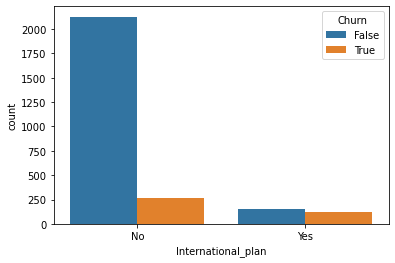

In [17]:
sns.countplot(data=df, x='International_plan', hue='Churn')

In [18]:
chi_2_test(df,"International_plan")

p value is 5.4269405491147075e-46
International_plan and Churn are dependant!


#### Relationship between Voice mail plan and churn

<AxesSubplot:xlabel='Voice_mail_plan', ylabel='count'>

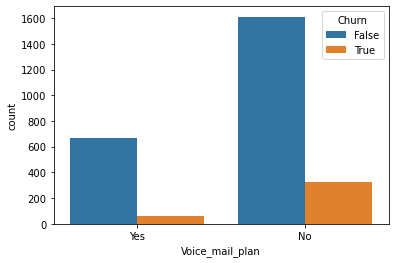

In [19]:
sns.countplot(data=df, x='Voice_mail_plan', hue='Churn')

In [20]:
chi_2_test(df, 'Voice_mail_plan')

p value is 4.079713016862758e-07
Voice_mail_plan and Churn are dependant!


#### Relationship between Customer service calls and Churn

<AxesSubplot:xlabel='Customer_service_calls', ylabel='count'>

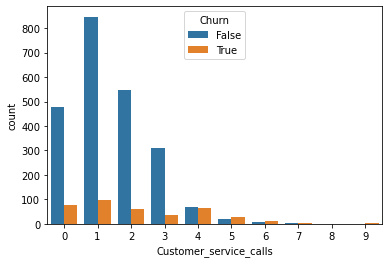

In [21]:
sns.countplot(data = df, x = "Customer_service_calls", hue = "Churn")

In [22]:
chi_2_test(df,"Customer_service_calls")

p value is 5.177967803990785e-56
Customer_service_calls and Churn are dependant!


#### there are also too many unique numbers of customer service calls, we are also going to replace it with a feature that brings as much insight to the model.

In [23]:
df["Customer_service_calls"] = np.where(df["Customer_service_calls"] >= 4, 0, 1)

<AxesSubplot:xlabel='Customer_service_calls', ylabel='count'>

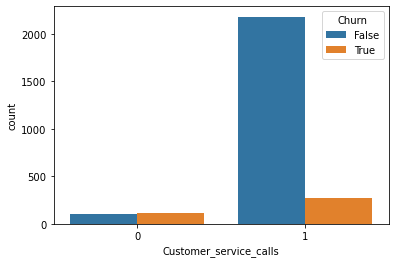

In [24]:
sns.countplot(data = df, x = "Customer_service_calls", hue = "Churn")

In [25]:
chi_2_test(df,"Customer_service_calls")

p value is 1.0265618986231913e-59
Customer_service_calls and Churn are dependant!


#### Relationship between Area Code and Churn

<AxesSubplot:xlabel='Area_code', ylabel='count'>

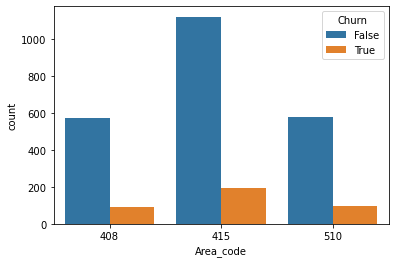

In [26]:
sns.countplot(data = df, x = "Area_code", hue = "Churn")

In [27]:
chi_2_test(df, 'Area_code')

p value is 0.9056446754773072
Area_code and Churn are independant!


### Overview of numerical columns

In [28]:
num_cols = ["Account_length",
    "Number_vmail_messages",
    'Total_day_minutes',
    'Total_day_calls',
    'Total_day_charge',
    'Total_eve_minutes',
    'Total_eve_calls',
    'Total_eve_charge',
    'Total_night_minutes',
    'Total_night_calls',
    'Total_night_charge',
    'Total_intl_minutes',
    'Total_intl_calls',
    'Total_intl_charge']

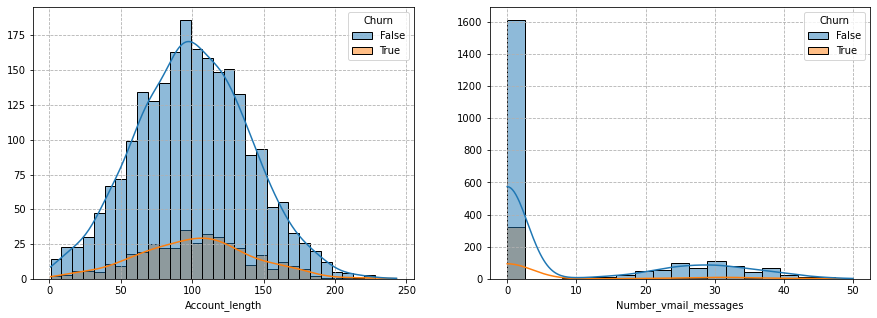

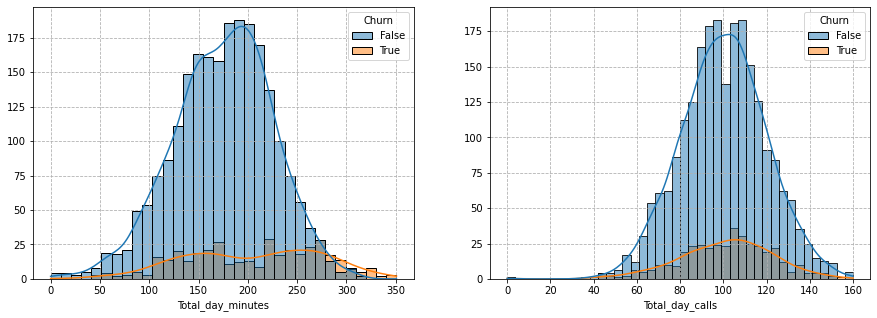

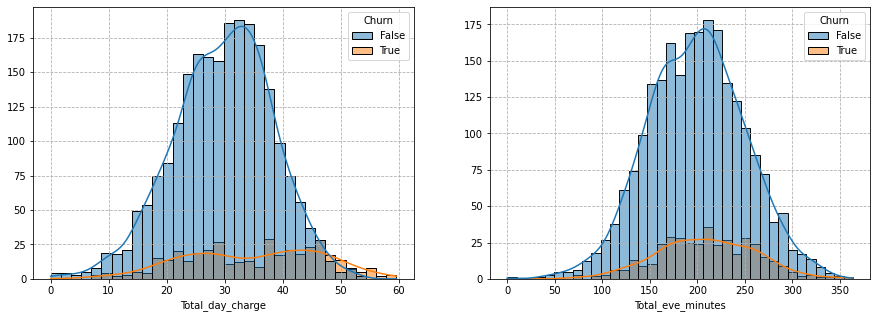

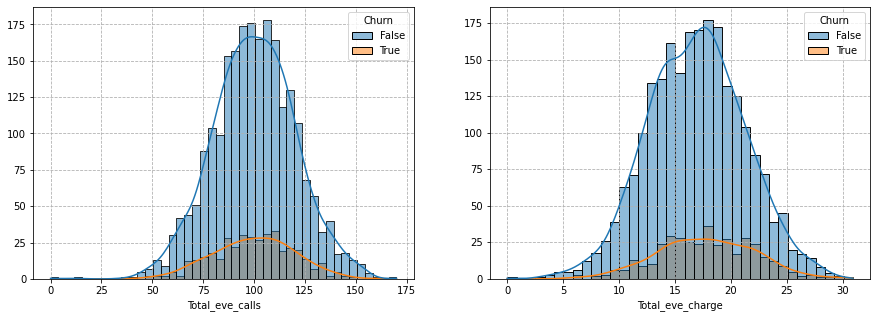

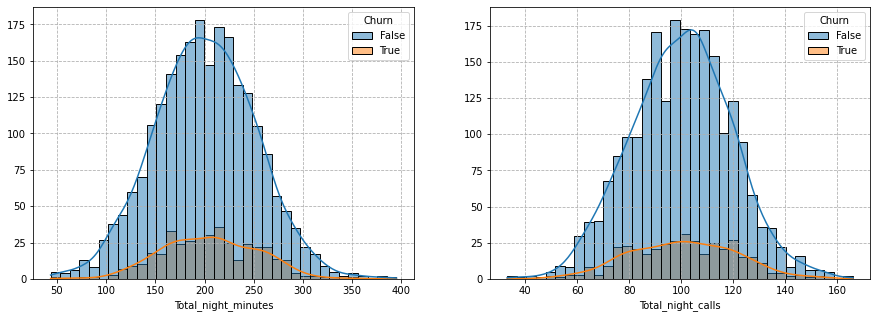

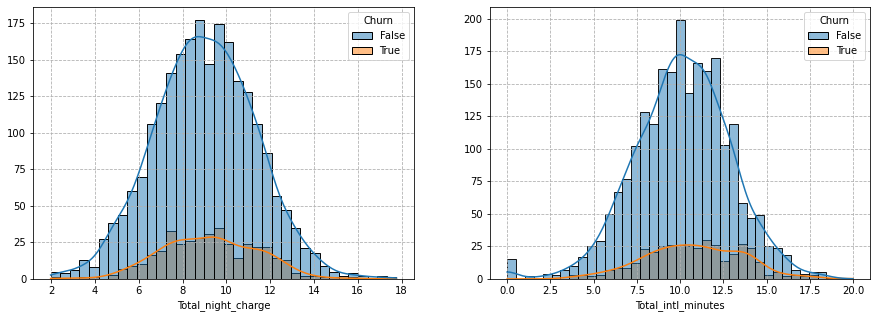

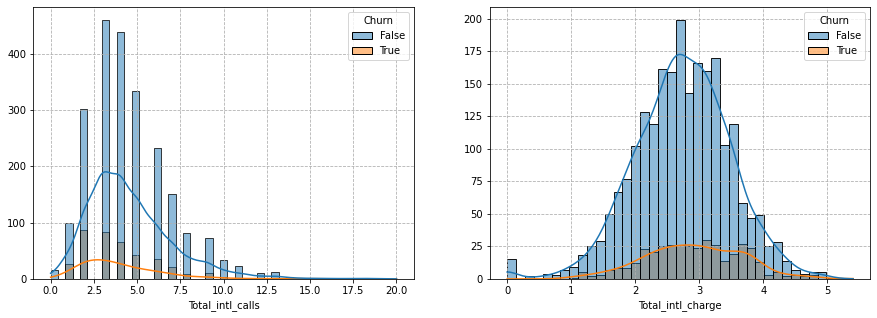

In [29]:
for i in range(0, len(num_cols), 2):
    fig, ax = plt.subplots(1,2, figsize = (15,5))
    sns.histplot(data=df, x=num_cols[i], hue='Churn', kde=True, ax=ax[0])
    sns.histplot(data=df, x=num_cols[i+1], hue='Churn', kde=True, ax=ax[1])
    for ax in ax:
        ax.grid(True, which='both', linestyle='--')
        ax.set(ylabel='')

This suggest that there might be outliers that we need to check for, we can also notice that churners tend to on avergae have values slightly bigger in every featurs other than total intl calls and Account length, which might make a bit of sense, since higher charge and expenditure might push customers to churn.

In [30]:
def out_zscore(data):
    outliers = []
    z_score = []
    treshhold = 3
    mean = np.mean(data)
    st_dev = np.std(data)
    for i in data:
        zscore = (i - mean) / st_dev
        z_score.append(zscore)
        if zscore > treshhold:
            outliers.append(i)
    return set(outliers)

In [31]:
for col in num_cols:
    print(f"Outliers of {col} are: ",out_zscore(df[col]))

Outliers of Account_length are:  {224, 225, 243, 221}
Outliers of Number_vmail_messages are:  {50}
Outliers of Total_day_minutes are:  {345.3, 346.8, 350.8}
Outliers of Total_day_calls are:  set()
Outliers of Total_day_charge are:  {58.96, 59.64, 58.7}
Outliers of Total_eve_minutes are:  {354.2, 363.7}
Outliers of Total_eve_calls are:  {170}
Outliers of Total_eve_charge are:  {30.11, 30.91}
Outliers of Total_night_minutes are:  {354.9, 395.0, 364.3, 364.9, 377.5, 381.9}
Outliers of Total_night_calls are:  {164, 166}
Outliers of Total_night_charge are:  {15.97, 16.39, 17.19, 17.77, 16.99, 16.42}
Outliers of Total_intl_minutes are:  {18.9, 20.0}
Outliers of Total_intl_calls are:  {12, 13, 14, 15, 16, 17, 18, 19, 20}
Outliers of Total_intl_charge are:  {5.1, 5.4}


method detected many outliers, they don't look like actual outliers in the context of the dataset , so we are leaving them in.b

To explore potential collinearity among numerical variables, we will compute their correlation coefficients. Identifying highly correlated variables is crucial for improving model performance and interpretability.

<AxesSubplot:>

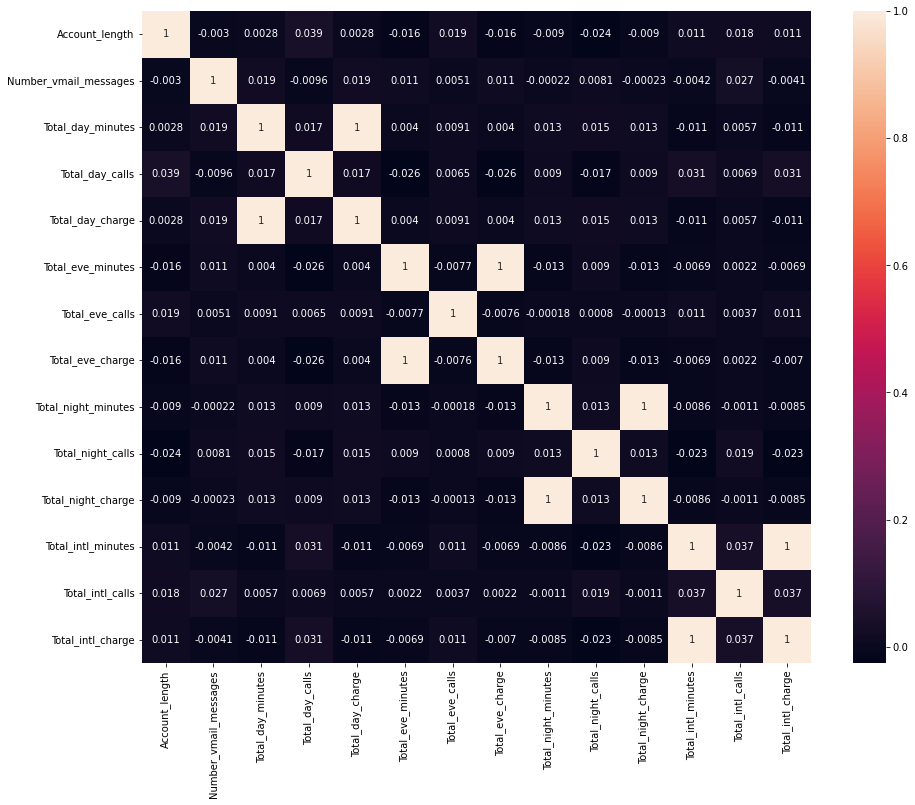

In [32]:
plt.figure(figsize=(15,12))
sns.heatmap(df[num_cols].corr(), annot=True)

In [33]:
drop_num_columns = ['Total_day_minutes', 'Total_eve_minutes', 'Total_night_minutes', 'Total_intl_minutes']

<AxesSubplot:>

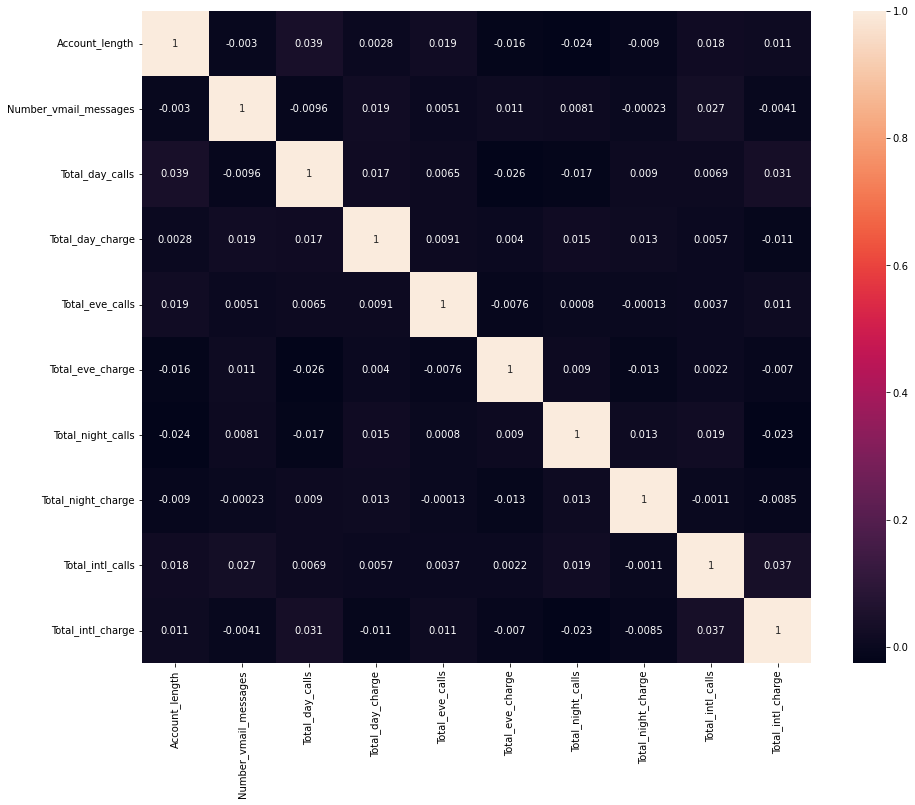

In [34]:
plt.figure(figsize=(15,12))
sns.heatmap(df[num_cols].drop(drop_num_columns, axis=1).corr(), annot=True)

In [35]:
df.replace(['Yes', 'No'], [1, 0], inplace=True)

In [36]:
X = df.drop("Churn", axis = 1)
y = df["Churn"]

### Model building:

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42, stratify = y)

We're refining our dataset by creating new features from existing columns, which will then serve as improved inputs for our models. These enhancements include:

- **Aggregate Total Minutes**: The combined total of day, evening, and night minutes, giving a full picture of usage.
- **Average Minutes per Call**: The overall average call duration, derived from the total minutes divided by the total number of calls.
- **Mean Charge per Call**: The average cost per call, calculated from the total charges divided by the total minutes.
- **Rate of International Use**: The proportion of international minutes to the total minutes, indicating international communication levels.

Also to tackle collinearity and improve model performance, we're removing minute columns due to their strong correlation with charge columns.

The implementation of these changes will be facilitated by a proposed `FeatureCreator` class, which automates the creation of these new composite features and the removal of the specified columns. This class aims to streamline our dataset, focusing on enhancing model accuracy and interpretability by introducing significant, derived features and minimizing redundancy.

In [38]:
class FeatureCreator(BaseEstimator, TransformerMixin):
    """
    Transformer to create new features
    """
    def __init__(self,to_drop):
        self.to_drop = to_drop
        
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = X.copy()

        # Create new features
        X_transformed["Total_number_of_minutes"] = X_transformed["Total_day_minutes"] + X_transformed["Total_eve_minutes"] + X_transformed["Total_night_minutes"]
        X_transformed["Total_minutes_per_call"] = X_transformed["Total_number_of_minutes"] / (X_transformed["Total_day_calls"] + X_transformed["Total_eve_calls"] + X_transformed["Total_night_calls"])
        X_transformed["Average_charge_per_call"] = (X_transformed["Total_day_charge"] + X_transformed["Total_eve_charge"] + X_transformed["Total_night_charge"]) / X_transformed["Total_number_of_minutes"]
        X_transformed["International_usage_rate"] = X_transformed["Total_intl_minutes"] / X_transformed["Total_number_of_minutes"]
        
        # Drop specified columns
        return X_transformed.drop(self.to_drop, axis=1)

We also create a class dedicated to scaling and transforming columns, specifically to normalize numerical columns and perform one-hot encoding on non-ordinal categorical columns within a Pandas DataFrame.

In [39]:
class Scaling(BaseEstimator, TransformerMixin):
    """
    Transformer to return a scaled dataframe
    """
    def __init__(self,num_columns,cat_columns,onehot_columns, scaler=StandardScaler()):
        self.scaler = scaler
        self.num_columns = num_columns
        self.cat_columns = cat_columns
        self.onehot_columns = onehot_columns
        
    def fit(self, X, y=None):
        self.scaler.fit(X[self.num_columns])
        return self

    def transform(self, X):
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.num_columns]),
                                columns=X[self.num_columns].columns,
                                index=X[self.num_columns].index)
        dummies = pd.get_dummies(X[self.onehot_columns].astype("object")).iloc[:,:2]
        X = pd.concat([X[self.cat_columns],X_scaled], axis = 1)
        X = pd.concat([X,dummies], axis = 1)
        return X

In [40]:
cat_cols = ["State","International_plan","Voice_mail_plan", "Customer_service_calls"]
one_hot_col = ["Area_code"]
num_cols = ["Account_length",
    "Number_vmail_messages",
    'Total_day_calls',
    'Total_day_charge',
    'Total_eve_charge', 
    'Total_eve_calls',
    'Total_night_calls',
    'Total_night_charge',
    'Total_intl_calls',
    'Total_intl_charge',
    "Total_number_of_minutes",
    "Total_minutes_per_call",
    "Average_charge_per_call",
    "International_usage_rate"]

In [41]:
pipeline = Pipeline(steps=[('feature_creation', FeatureCreator(drop_num_columns)),('scaling', Scaling(num_cols,cat_cols,one_hot_col))])

In [42]:
X_train_wf = pipeline.fit_transform(X_train)
X_test_wf = pipeline.transform(X_test)

For our churn prediction project, we're deploying a range of sophisticated machine learning models, each selected for its classification prowess:

- **AdaBoost**: A boosting algorithm that combines multiple weak learners to improve their accuracy, effectively adjusting to the peculiarities of the churn prediction task.
- **Random Forest**: Leverages multiple decision trees to enhance prediction accuracy while mitigating overfitting.
- **GBM (Gradient Boosting Machines)**: Sequentially builds models to effectively reduce prediction errors, adaptable to diverse datasets.
- **XGBoost**: Offers an optimized, high-performance implementation of gradient boosting known for its efficiency and accuracy.
- **LightGBM**: Designed for speed and efficiency, making it ideal for handling large, high-dimensional datasets.
- **CatBoost**: Excellently manages categorical data, reducing the need for extensive preprocessing.

This suite of models is chosen to capitalize on their distinct advantages, aiming to pinpoint the most effective strategy for accurate churn prediction.

In [43]:
random_state = 123
classifiers = []
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(LGBMClassifier(random_state = random_state, verbose=-1))
classifiers.append(CatBoostClassifier(logging_level='Silent'))
classifiers.append(XGBClassifier(random_state=random_state))

In [44]:
kfold = StratifiedKFold(5)

In [45]:
accuracy = []
precision = []
recall = []
roc_auc = []
f1 = []
fbeta_2 = []

for classifier in classifiers:
    y_pred = cross_val_predict(classifier, X_train_wf, y_train, cv=kfold)
    accuracy.append(accuracy_score(y_pred, y_train))
    precision.append(precision_score(y_pred, y_train))
    recall.append(recall_score(y_pred, y_train))
    roc_auc.append(roc_auc_score(y_pred, y_train))
    f1.append(f1_score(y_pred, y_train))
    fbeta_2.append(fbeta_score(y_pred, y_train, beta=2))

In [46]:
model_scores = pd.DataFrame({'accuracy': accuracy, 'precision': precision, 'recall': recall, 'roc_auc': roc_auc, 'f1': f1, 'fbeta_2': fbeta_2},
                           index=['AdaBoost', 'Random Forest', 'GBM', 'XGBoost', 'LightGBM', 'CatBoost'])
model_scores.sort_values(by=['fbeta_2'], ascending=False)

,accuracy,precision,recall,roc_auc,f1,fbeta_2
LightGBM,0.964822,0.793548,0.957198,0.961533,0.867725,0.919283
XGBoost,0.960600,0.767742,0.952000,0.956871,0.850000,0.908397
GBM,0.959193,0.754839,0.955102,0.957413,0.843243,0.906977
Random Forest,0.954034,0.706452,0.969027,0.960641,0.817164,0.901977
CatBoost,0.956379,0.754839,0.932271,0.945933,0.834225,0.890411
AdaBoost,0.919794,0.738710,0.717868,0.836596,0.728140,0.721942


We will now employ GridSearchCV to identify optimal parameters for our selected models: XGBClassifier, LGBMClassifier, and RandomForestClassifier.

In [47]:
lgbm_clf = LGBMClassifier(verbose=-1)
lgbm_param_grid = {
    'num_leaves': [31, 62],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [5, 10]
}
grid_search = GridSearchCV(
    estimator=lgbm_clf,
    param_grid=lgbm_param_grid,
    cv=kfold,
    scoring='f1',
    verbose=1,
    n_jobs=-1
)
grid_search.fit(X_train_wf,y_train)
lgbm_best = grid_search.best_estimator_

print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'num_leaves': 62}
0.868897375636506


In [48]:
xgb_clf = XGBClassifier()
xgb_param_grid = {
    'learning_rate': [0.1, 0.2],
    'n_estimators': [100, 200],
    'max_depth': [6, 9]
}
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=xgb_param_grid,
    cv=kfold,
    scoring='f1',
    verbose=1,
    n_jobs=-1
)
grid_search.fit(X_train_wf,y_train)
xgb_best = grid_search.best_estimator_

print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 200}
0.8535035892448922


In [49]:
rf_clf = RandomForestClassifier()
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10]
}
grid_search = GridSearchCV(
    estimator=rf_clf,
    param_grid=rf_param_grid,
    cv=kfold,
    scoring='f1',
    verbose=1,
    n_jobs=-1
)
grid_search.fit(X_train_wf,y_train)
rf_best = grid_search.best_estimator_

print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
0.8431059765965427


In [50]:
def train_predict(X_train,X_test,y_train,y_test, model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    return y_pred

In [51]:
predictions = {}
models = [('LightGBM', lgbm_best), ('XGBoost', xgb_best), ('RandomForest', rf_best)]
for model in models:
    predictions[model[0]] = train_predict(X_train_wf, X_test_wf, y_train,y_test, model[1])

LightGBM
              precision    recall  f1-score   support

       False       0.95      1.00      0.97       456
        True       0.96      0.69      0.81        78

    accuracy                           0.95       534
   macro avg       0.96      0.84      0.89       534
weighted avg       0.95      0.95      0.95       534

XGBoost
              precision    recall  f1-score   support

       False       0.95      0.99      0.97       456
        True       0.95      0.69      0.80        78

    accuracy                           0.95       534
   macro avg       0.95      0.84      0.89       534
weighted avg       0.95      0.95      0.95       534

RandomForest
              precision    recall  f1-score   support

       False       0.95      0.99      0.97       456
        True       0.95      0.68      0.79        78

    accuracy                           0.95       534
   macro avg       0.95      0.84      0.88       534
weighted avg       0.95      0.95      0.94 

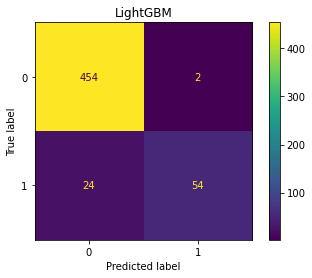

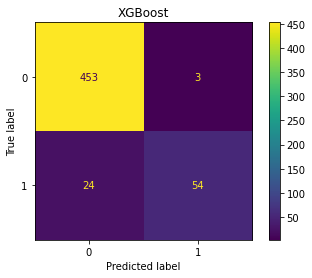

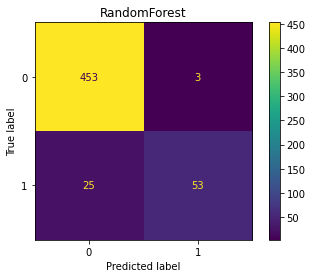

In [52]:
for prediction in predictions:
    print(prediction)
    print(classification_report(y_test,predictions[prediction]))
    matrix = ConfusionMatrixDisplay(confusion_matrix(y_test,predictions[prediction]))
    matrix.plot()
    matrix.ax_.set_title(prediction)

Now I'm going to build a composite model by merging three renowned classifiers—LightGBM, XGBoost, and RandomForest—utilizing the VotingClassifier. This ensemble approach will employ both hard and soft voting strategies to synergize the unique advantages of each constituent classifier.

In [53]:
voting_types = ['soft', 'hard']
voting_predictions = {}
voting_models = {}

for voting_type in voting_types:
    composite_clf = VotingClassifier(estimators=models, voting=voting_type)
    y_pred = train_predict(X_train_wf,X_test_wf,y_train,y_test, model=composite_clf)
    voting_predictions[voting_type] = y_pred
    voting_models[voting_type] = composite_clf

soft
              precision    recall  f1-score   support

       False       0.95      1.00      0.97       456
        True       0.96      0.69      0.81        78

    accuracy                           0.95       534
   macro avg       0.96      0.84      0.89       534
weighted avg       0.95      0.95      0.95       534

hard
              precision    recall  f1-score   support

       False       0.95      1.00      0.97       456
        True       0.96      0.71      0.81        78

    accuracy                           0.95       534
   macro avg       0.96      0.85      0.89       534
weighted avg       0.95      0.95      0.95       534



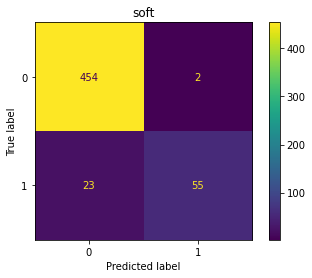

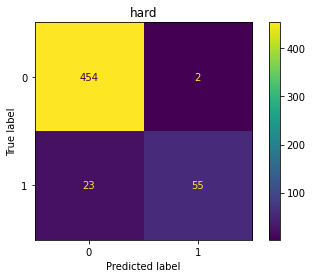

In [54]:
for voting_prediction in voting_predictions:    
    print(voting_prediction)
    print(classification_report(y_test,voting_predictions[voting_prediction]))
    composite_matrix = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred))
    composite_matrix.plot()
    composite_matrix.ax_.set_title(voting_prediction)

#### Model Evaluation on test set:

In [55]:
df_test = pd.read_csv("C:\\Users\\user\\Desktop\\churn prediction model\\archive\\churn-bigml-20.csv")

In [56]:
X_test_df = df_test.drop("Churn", axis = 1)
y_test_df = df_test["Churn"]

In [57]:
X_test_df['State'].replace(churn_less_10, 0, inplace=True)
X_test_df['State'].replace(churn_more_10, 1, inplace=True)
X_test_df['State'].replace(churn_more_20, 2, inplace=True)
X_test_df["Customer service calls"] = np.where(X_test_df["Customer service calls"] >= 4, 0, 1)

In [58]:
X_test_df.replace(['Yes', 'No'], [1, 0], inplace=True)
X_test_df.columns = X_test_df.columns.str.replace(' ', '_')

In [59]:
X_train_df = pipeline.fit_transform(X)
X_test_df = pipeline.transform(X_test_df)

In [60]:
all_models = [('LightGBM', lgbm_best), ('XGBoost', xgb_best), ('RandomForest', rf_best),
          ('soft_composite', voting_models['soft']), ('hard_composite', voting_models['hard'])]

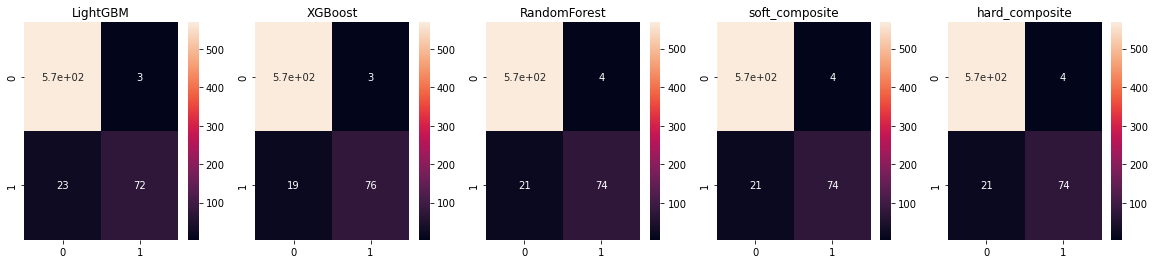

In [61]:
fig,ax = plt.subplots(1,5, figsize = (20,4))
for i, model in enumerate(all_models):
    ax[i].set_title(model[0])
    y_pred = train_predict(X_train_df, X_test_df, y, y_test_df, model=model[1])
    sns.heatmap(confusion_matrix(y_test_df, y_pred), annot=True, ax = ax[i])

From the graphs presented in the figure, it is evident that composite models do not significantly enhance model performance. Given the best performance observed, the XGBoost model emerges as our preferred choice

Next, let's illustrate the key features driving the predictions of our selected model.

<AxesSubplot:xlabel='Importance', ylabel='Feature'>

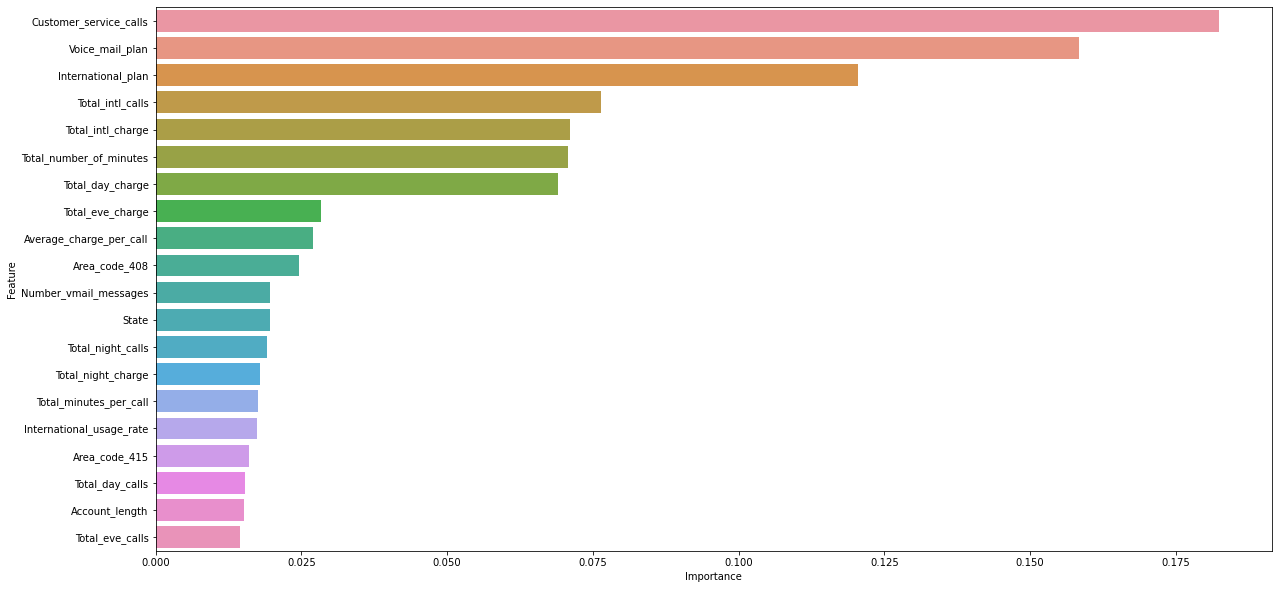

In [62]:
features_imp = xgb_best.feature_importances_
features_imp_df = pd.DataFrame({"Feature": X_train_df.columns, 
                                "Importance": features_imp}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(20,10))
sns.barplot(data=features_imp_df, x="Importance", y="Feature")

Next, I will utilize the PermutationImportance() method to ascertain which features significantly influence the model’s predictions when their values are shuffled. This technique will provide insights into the dependency of the model on specific features.

In [63]:
perm_imp = PermutationImportance(xgb_best, n_iter=5, random_state=123)
perm_imp.fit(X_train_df, y)

eli5.show_weights(perm_imp, feature_names=X_train_df.columns.tolist())

Weight,Feature
0.0661 ± 0.0053,Total_number_of_minutes
0.0630 ± 0.0039,Total_day_charge
0.0611 ± 0.0034,Customer_service_calls
0.0563 ± 0.0039,International_plan
0.0259 ± 0.0054,Total_intl_calls
0.0245 ± 0.0019,Voice_mail_plan
0.0239 ± 0.0012,Total_intl_charge
0.0154 ± 0.0040,Total_eve_charge
0.0065 ± 0.0016,State
0.0037 ± 0.0020,Account_length


High feature importance may suggest model overfitting. It's essential to assess Permutation Importance on both training and test data. Comparing the importance across these datasets helps identify and remove noisy features, thereby preventing overfitting.

In [64]:
perm_imp.fit(X_test_df, y_test_df)
eli5.show_weights(perm_imp, feature_names=X_test_df.columns.tolist())

Weight,Feature
0.0693 ± 0.0106,Total_day_charge
0.0663 ± 0.0092,Total_number_of_minutes
0.0612 ± 0.0052,Customer_service_calls
0.0351 ± 0.0082,International_plan
0.0348 ± 0.0058,Voice_mail_plan
0.0180 ± 0.0027,Total_intl_charge
0.0123 ± 0.0101,Total_intl_calls
0.0090 ± 0.0095,Total_eve_charge
0.0054 ± 0.0062,Average_charge_per_call
0.0030 ± 0.0019,State


**Decision on Feature Removal:**
- **Candidates for Removal**: Based on the observed permutation importance, the following features could be candidates for removal due to their low contribution or inconsistent behavior across datasets:
  - **Area_code_408, Area_code_415**
  - **Total_eve_calls, Total_night_calls, Total_day_calls**
  - **Account_length**
  - **Total_minutes_per_call** (consider further evaluation due to its potential inconsistency)
  - **Number_vmail_messages** (shows negative importance in the test set)

              precision    recall  f1-score   support

       False       0.97      0.99      0.98       572
        True       0.96      0.80      0.87        95

    accuracy                           0.97       667
   macro avg       0.96      0.90      0.93       667
weighted avg       0.97      0.97      0.97       667



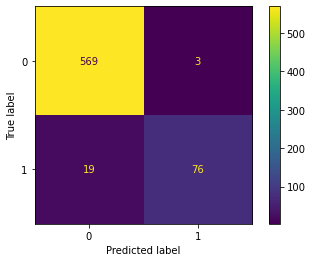

In [65]:
y_pred = train_predict(X_train_df, X_test_df, y, y_test_df, xgb_best)
print(classification_report(y_test_df, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test_df, y_pred)).plot()

              precision    recall  f1-score   support

       False       0.97      0.99      0.98       572
        True       0.94      0.80      0.86        95

    accuracy                           0.96       667
   macro avg       0.95      0.90      0.92       667
weighted avg       0.96      0.96      0.96       667



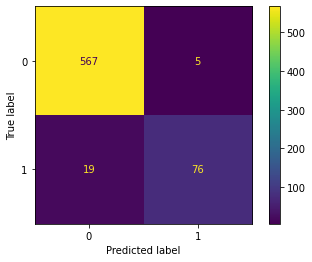

In [66]:
features_to_drop = ['Area_code_408', 'Area_code_415', 'Total_eve_calls', 'Total_night_calls', 'Total_day_calls',
                   'Account_length', 'Total_minutes_per_call', 'Number_vmail_messages']
features = X_train_df.columns[~X_train_df.columns.isin(features_to_drop)]

y_pred_dropped = train_predict(X_train_df[features], X_test_df[features], y, y_test_df, xgb_best)
print(classification_report(y_test_df, y_pred_dropped))
ConfusionMatrixDisplay(confusion_matrix(y_test_df, y_pred_dropped)).plot()

Unfortunately, removing features based on their permutation importance did not enhance the model's performance on the test set. Therefore, I have decided not to proceed with dropping these features. This decision underscores the complexity of feature selection and its impact on model behavior across different datasets.